In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/TANNERU/Downloads/Dataset for coding/imdb_labelled.txt",delimiter = '\t',names = ['Reviews','Status'])

In [3]:
df

,Reviews,Status
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [5]:
df['Reviews'][745]

'In a word, it is embarrassing.  '

In [6]:
from collections import Counter
print(Counter(df['Status']))

Counter({1: 386, 0: 362})


In [7]:
df.isnull().sum()

Reviews    0
Status     0
dtype: int64

In [8]:
X = df['Reviews']
Y = df['Status']

In [9]:
X

0      A very, very, very slow-moving, aimless movie ...
1      Not sure who was more lost - the flat characte...
2      Attempting artiness with black & white and cle...
3           Very little music or anything to speak of.  
4      The best scene in the movie was when Gerardo i...
                             ...                        
743    I just got bored watching Jessice Lange take h...
744    Unfortunately, any virtue in this film's produ...
745                     In a word, it is embarrassing.  
746                                 Exceptionally bad!  
747    All in all its an insult to one's intelligence...
Name: Reviews, Length: 748, dtype: object

In [10]:
Y

0      0
1      0
2      0
3      0
4      1
      ..
743    0
744    0
745    0
746    0
747    0
Name: Status, Length: 748, dtype: int64

# Data Cleaning

In [11]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [14]:
ps = PorterStemmer()
lemma = WordNetLemmatizer()
corpus = []

In [15]:
for i in range(0,len(X)):
    review = re.sub('[^a-zA-Z]',' ',X[i])
    review = review.lower()
    review = review.split()
    #stemming
    #review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    #lemmatising
    review = [lemma.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    

In [16]:
corpus

['slow moving aimless movie distressed drifting young man',
 'sure lost flat character audience nearly half walked',
 'attempting artiness black white clever camera angle movie disappointed became even ridiculous acting poor plot line almost non existent',
 'little music anything speak',
 'best scene movie gerardo trying find song keep running head',
 'rest movie lack art charm meaning emptiness work guess empty',
 'wasted two hour',
 'saw movie today thought good effort good message kid',
 'bit predictable',
 'loved casting jimmy buffet science teacher',
 'baby owl adorable',
 'movie showed lot florida best made look appealing',
 'song best muppets hilarious',
 'cool',
 'right case movie delivers everything almost right face',
 'average acting main person low budget clearly see',
 'review long overdue since consider tale two sister single greatest film ever made',
 'put gem movie term screenplay cinematography acting post production editing directing aspect film making',
 'practically

In [17]:
len(corpus)

748

In [19]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers.embeddings import Embedding

# One_hot

In [23]:
vocab_size = 5000

In [24]:
onehot = [one_hot(word,vocab_size) for word in corpus]

In [25]:
onehot

[[2076, 1229, 3018, 4585, 2765, 484, 1029, 2556],
 [4325, 4945, 4401, 4797, 4459, 3996, 3959, 3467],
 [4040,
  573,
  1682,
  398,
  3252,
  802,
  4521,
  4585,
  4428,
  4926,
  350,
  1667,
  49,
  3582,
  3914,
  2926,
  560,
  3827,
  1984],
 [215, 4615, 1412, 4402],
 [4027, 3404, 4585, 1901, 1187, 4958, 3780, 4415, 1065, 258],
 [1021, 4585, 1482, 818, 4991, 4128, 1827, 3342, 3337, 229],
 [2832, 2230, 2543],
 [2418, 4585, 3186, 3600, 2791, 4734, 2791, 3570, 1784],
 [3168, 2117],
 [896, 3367, 4583, 313, 645, 4714],
 [358, 2826, 758],
 [4585, 4549, 4327, 2294, 4027, 1430, 2377, 4028],
 [3780, 4027, 2592, 2946],
 [4439],
 [4867, 3373, 4585, 4872, 3236, 560, 4867, 4347],
 [2101, 49, 2408, 3763, 765, 3084, 717, 2226],
 [1141, 2088, 942, 546, 4722, 4680, 2230, 3081, 2531, 3492, 3537, 566, 1430],
 [3212, 4828, 4585, 478, 559, 165, 49, 506, 3146, 4210, 102, 4498, 3537, 497],
 [2474, 4512, 3142, 3067, 1109, 3807, 3067],
 [4518,
  3537,
  2430,
  786,
  4647,
  1980,
  3407,
  4812,
  3537,

In [28]:
onehot[99]

[3914, 672]

In [29]:
len(onehot[99])

2

# Padding

In [30]:
max_length = 25

In [31]:
pad_docs = pad_sequences(onehot,padding ='pre',maxlen = max_length)

In [32]:
pad_docs

array([[   0,    0,    0, ...,  484, 1029, 2556],
       [   0,    0,    0, ..., 3996, 3959, 3467],
       [   0,    0,    0, ...,  560, 3827, 1984],
       ...,
       [   0,    0,    0, ...,    0,  405, 4913],
       [   0,    0,    0, ...,    0, 1109, 4565],
       [   0,    0,    0, ..., 3500, 3564,  623]])

In [33]:
len(pad_docs[0])

25

In [34]:
pad_docs.shape

(748, 25)

# Creating model

In [35]:
dimensions = 40

In [41]:
model = Sequential()
model.add(Embedding(vocab_size,dimensions,input_length = max_length))
model.add(Dropout(0.3))
model.add(SimpleRNN(100,activation="tanh"))
model.add(Dropout(0.3))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 25, 40)            200000    
_________________________________________________________________
dropout_9 (Dropout)          (None, 25, 40)            0         
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 100)               14100     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 214,201
Trainable params: 214,201
Non-trainable params: 0
_________________________________________________________________


In [43]:
inputs = np.array(pad_docs)
Y = np.array(Y)#labels

In [44]:
inputs.shape

(748, 25)

In [45]:
Y.shape

(748,)

# splitting

In [60]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(inputs,Y,test_size = 0.25,random_state = 0) 

In [61]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(561, 25)
(187, 25)
(561,)
(187,)


In [62]:
cl = model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest),epochs=10,batch_size = 64)

Train on 561 samples, validate on 187 samples
Epoch 1/10
561/561 [==============================] - 0s 215us/step - loss: 0.3329 - acc: 0.8556 - val_loss: 0.2529 - val_acc: 0.8930
Epoch 2/10
561/561 [==============================] - 0s 167us/step - loss: 0.2235 - acc: 0.9234 - val_loss: 0.2414 - val_acc: 0.8824
Epoch 3/10
561/561 [==============================] - 0s 169us/step - loss: 0.1723 - acc: 0.9465 - val_loss: 0.2310 - val_acc: 0.8984
Epoch 4/10
561/561 [==============================] - 0s 171us/step - loss: 0.1278 - acc: 0.9697 - val_loss: 0.2234 - val_acc: 0.9037
Epoch 5/10
561/561 [==============================] - 0s 176us/step - loss: 0.1016 - acc: 0.9786 - val_loss: 0.2089 - val_acc: 0.9037
Epoch 6/10
561/561 [==============================] - 0s 178us/step - loss: 0.0855 - acc: 0.9804 - val_loss: 0.2161 - val_acc: 0.8984
Epoch 7/10
561/561 [==============================] - 0s 178us/step - loss: 0.0729 - acc: 0.9840 - val_loss: 0.2138 - val_acc: 0.8984
Epoch 8/10
561/5

In [66]:
Ypred = model.predict_classes(Xtest)

In [67]:
Ypred

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [68]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest,Ypred))

[[88 12]
 [ 7 80]]


In [69]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Ytest,Ypred))

0.8983957219251337


# Data Visualization

In [70]:
import matplotlib.pyplot as plt

In [71]:
cl.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

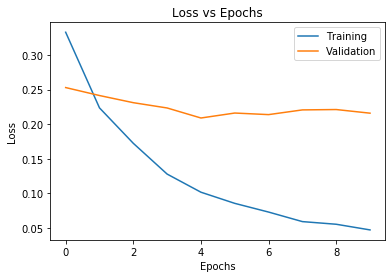

In [72]:
#Loss visualization
plt.plot(cl.history['loss'],label = 'Training')
plt.plot(cl.history['val_loss'],label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

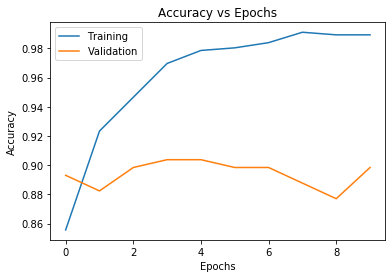

In [73]:
#Accuracy visualization
plt.plot(cl.history['acc'],label = 'Training')
plt.plot(cl.history['val_acc'],label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()